<a href="https://colab.research.google.com/github/Laharika108/MySql/blob/main/FraudEmailDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
label
ham     4825
spam     747
Name: count, dtype: int64
Accuracy: 0.9856502242152466

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg    

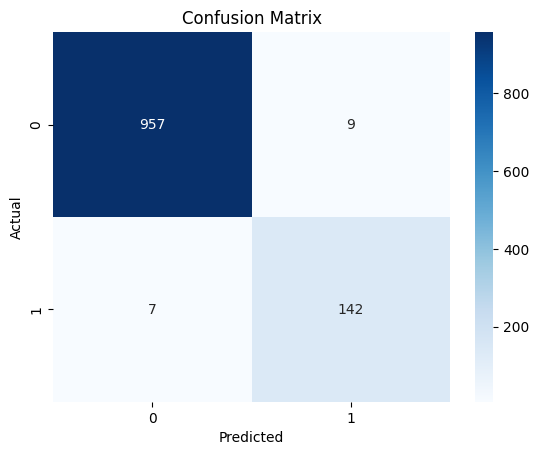

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])
print(df.head())





# ---
#  #Data Cleaning

print(df.info())
print(df['label'].value_counts())
#  #Encode labels:

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# #Now:

# 0 = ham (non-spam)

# 1 = spam (fraud)



# ---
# #Step 3: Text Preprocessing

# Use Bag of Words (BoW) using CountVectorizer to convert text to numbers.

cv = CountVectorizer()
X = cv.fit_transform(df['message'])
y = df['label']

# #Explanation:

# fit_transform(): learns the vocabulary and transforms the text into a sparse matrix of word counts.



# ---

# #Step 4: Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 80% training, 20% testing

# random_state=42: makes results reproducible



# ---

# #Step 5: Train Naive Bayes Model

model = MultinomialNB()
model.fit(X_train, y_train)

# #Why Naive Bayes?

# #Works well for text classification

# #Fast and easy for baseline models



# ---

# #✅ Step 6: Make Predictions

y_pred = model.predict(X_test)


# ---

# #📊 Step 7: Evaluate Model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()